In [ ]:
from mtm026 import *

x, q0, EI = sp.symbols('x q0 EI')
u = sp.Function('u')(x) # u(x)

sp.diff(EI*u, x, 4) # EI*u''''(x)

diffekv = sp.diff(EI*u, x, 4) - q0
sol = sp.dsolve(diffekv)
u = sol.rhs

displayvar('ekvation', u)

<IPython.core.display.Math object>

In [20]:
L, C1, C2, C3, C4 = sp.symbols('L C1 C2 C3 C4')

uprim = sp.diff(u, x)
ubiss = sp.diff(u, x, 2)

RV1 = sp.Eq(u.subs(x, 0), 0)
RV2 = sp.Eq(ubiss.subs(x, 0), 0)
RV3 = sp.Eq(u.subs(x, 2*L), 0)
RV4 = sp.Eq(uprim.subs(x, 2*L), 0)

konstanter = sp.solve([RV1, RV2, RV3, RV4], [C1, C2, C3, C4])

u = u.subs(konstanter)
display(u)

L**3*q0*x/(6*EI) - L*q0*x**3/(8*EI) + q0*x**4/(24*EI)

In [21]:
u = u.subs(x, L)
display(u)

L**4*q0/(12*EI)

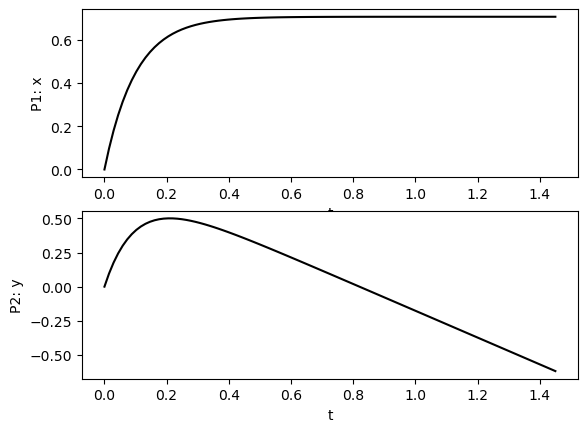

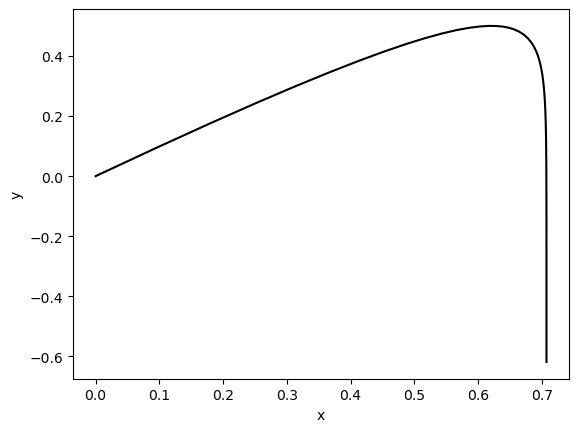

In [1]:
# -*- coding: utf-8 -*-
#"""
#Created on Tue Sep 19 12:55:04 2023
#
#@author: petrip
#"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System av först ordningens differentialekvation
def MittSystem(t, u, g, k, m):
    u1_dot = u[2] # dx
    u2_dot = u[3] # dy
    u3_dot = -k * u[2] # d2x
    u4_dot = -k * u[3] - m*g# d2y
    return np.array([u1_dot,u2_dot,u3_dot,u4_dot])
# Massmatris
def Massmatris(t, u, m):
    M = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,m,0],
    [0,0,0,m]
    ])
    return M
# Systemet och massmatrisen
def System_med_massmatris(t,u,g,k,m):
# Beräkna systemet utan massmatris
    f = MittSystem(t, u, g, k, m)
# Beräkna massmatrisen
    M = Massmatris(t, u, m)
# Ta fram u_dot genom att multiplicera båda sidorna med M^{-1}
    u_dot = np.linalg.solve(M, f) # This solves the equation M * u_dot = f
    return u_dot
# Parametrar
g = 9.82
k = 10
m = 1
alpha = np.pi/4
# Lösning av det dynamiska systemet
# Begynnelsevillkor
v0 = 10
u_0 = np.array([0, 0, v0*np.cos(alpha), v0*np.sin(alpha)])
# Simuleringstid
t_span = (0,1.45)
t_eval = np.linspace(0, 1.45, 100)
# Integrationsparametrar
ode_args = (g,k,m)
# ODE-lösaren
sol = solve_ivp(System_med_massmatris, t_span, u_0, method = 'RK45', t_eval =
t_eval, args=ode_args, rtol = 1e-4, atol = 1e-4)
# Plottar
# Plotta x- och y-koordinater
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], 'k')
plt.xlabel('t')
plt.ylabel('P1: x')
plt.subplot(2, 1, 2)
plt.plot(sol.t, sol.y[1], 'k')
plt.xlabel('t')
plt.ylabel('P2: y')
# Plotta kastbanan
plt.figure()
plt.plot( sol.y[0], sol.y[1], 'k')
plt.xlabel('x')
plt.ylabel('y')
# =============================================================================
plt.show()